In [1]:
from py.mKMeans import KMeans, KMeansPlus, SoftKMeans, EnhancedKMeans
from py.mPCA import PCA
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import cppyy
import ctypes

cppyy.include(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\SDM274_ML_AI\LinearAutoEncoder\src\LinearAutoEncoder.h")

%matplotlib inline

def get2DCppArray(X):
    if isinstance(X, np.ndarray):
        data_list = X.tolist()
    else:
        data_list = X 
    vector_vector_double = cppyy.gbl.std.vector[cppyy.gbl.std.vector['double']]
    vector_double = cppyy.gbl.std.vector['double']
    inputs = vector_vector_double()
    for sample in data_list:
        sample_vector = vector_double()
        for feature in sample:
            sample_vector.push_back(feature)
        inputs.push_back(sample_vector)
    return inputs

def get1DCppArray(X):
    if isinstance(X, np.ndarray):
        data_list = X.tolist()
    else:
        data_list = X 
    vector_double = cppyy.gbl.std.vector['double']
    labels_vector = vector_double()
    for label in data_list:
        labels_vector.push_back(label)
    return labels_vector

def get1DPyarray(ctypes_array):
    # 获取Ctypes数组的长度
    length = len(ctypes_array)

    # 将Ctypes数组转换为NumPy数组
    numpy_array = np.fromiter(ctypes_array, dtype=np.float64, count=length)

    return numpy_array

# 其实这里是非线性的（）jupyter notebook改名字太难改了，没有一键refactor，就这样了（）
class LinearEncoder:
    def __init__(self, epochs, learning_rate, inputSize, hidden):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.inputSize = inputSize
        self.model = cppyy.gbl.PY_LAE()
        hidden = cppyy.gbl.std.vector[int](hidden)
        self.model.selfInit(epochs, learning_rate, inputSize, hidden)
        
    def setLR_VOKE(self, LR_VOKE):
        self.model.setLR_VOKE(LR_VOKE)
        pass;
    
    def train(self, X, y):
        if isinstance(X, np.ndarray):
            data_list = X.tolist()
        else:
            data_list = X 

        if isinstance(y, np.ndarray):
            labels_list = y.tolist()
        else:
            labels_list = y
        
        # declare std::vector in python
        vector_vector_double = cppyy.gbl.std.vector[cppyy.gbl.std.vector['double']]
        vector_double = cppyy.gbl.std.vector['double']

        # transverse inputs
        inputs = vector_vector_double()
        for sample in data_list:
            sample_vector = vector_double()
            for feature in sample:
                sample_vector.push_back(feature)
            inputs.push_back(sample_vector)

        # transverse labels
        labels_vector = get2DCppArray(labels_list)
        
        self.model.train(inputs, labels_vector)
        pass
    
    def predict(self, X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.predict(X))
    
    def encode(self, X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.encode(X))
        
    
    def decode(self, X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.decode(X))
    
    def binaryDecode(self,X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.binaryDecode(X))
        

Then, let's begin to process the graphs.
Read a certain graph:

In [91]:
size = 50
def getCVArray(path, title = 'avatar'):
    img = cv.imread(path)
    img = cv.resize(img, (size,size))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    
    # change to n*3 array
    img_arr = np.array(img)
    img_arr = img_arr.reshape(-1,3)
    return img_arr
# # kazuha1
n = size**2
def readImg(path):
    img = cv.imread(path, 0)
    
    img = cv.resize(img, (size, size))
    x = np.reshape(img, (1,n))
    x = x.astype(float)
    x /= 255
    return x

x = readImg(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\kazuha2.jpg")
y = readImg(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\ganyu2.png")
z = readImg(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\paimon2.png")
# img = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\kazuha1.png", 0)
# # img = cv.imread(r"D:\resource\mizh\kazuma.jpg", 0)
# size = 128
# n = size**2
# img = cv.resize(img, (size, size))
# x = np.reshape(img, (1,n))
# x = x.astype(float)
# x /= 255
# # img = cv.imread(r"D:\resource\mizh\fnn.jpg", 0)
# img = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\ganyu2.png", 0)
# img = cv.resize(img, (size, size))
# y = np.reshape(img,(1,n))
# y = y.astype(float)
# y /= 255
# lea = LinearEncoder(5000,0.01,n,3)
train_data = np.array([y[0],x[0],z[0]])
print(train_data)


[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.94509804 0.96862745 0.99215686 ... 0.88235294 0.88627451 0.88627451]
 [0.98823529 0.98431373 0.99215686 ... 0.03921569 0.50980392 0.58431373]]


In [96]:
h = [50]
lea = LinearEncoder(2000,0.02,n, h)
lea.setLR_VOKE(400)
lea.train(train_data, train_data)

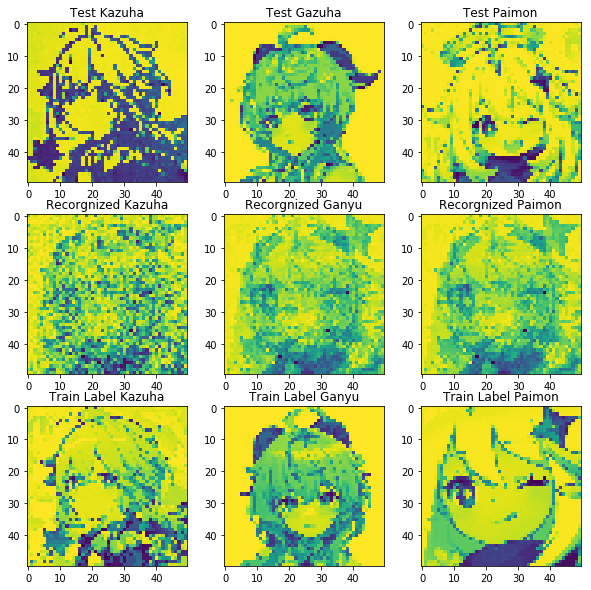

In [97]:
img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\kazuha3.png", 0)
# img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\test_kazuha2.jpg", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))

plt.figure(figsize=(10, 10))  # 调整画布大小
plt.subplot(3,3,1)
plt.imshow(img_kazuha2)
plt.title('Test Kazuha')

x2 = np.reshape(img_kazuha2, (1,n))
x2 = x2.astype(float)
x2 /= 255

x2_enc = lea.encode(x2[0])
x2_dec = lea.decode(x2_enc)
x2_construct = np.resize(x2_dec,(size,size))

plt.subplot(3,3,4)
plt.imshow(x2_construct)
plt.title('Recorgnized Kazuha')

img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\ganyu1.png", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))


plt.subplot(3,3,2)
plt.imshow(img_kazuha2)
plt.title('Test Gazuha')

x2 = np.reshape(img_kazuha2, (1,n))
x2 = x2.astype(float)
x2 /= 255

x2_enc = lea.encode(x2[0])
x2_dec = lea.decode(x2_enc)
x2_construct = np.resize(x2_dec,(size,size))

plt.subplot(3,3,5)
plt.imshow(x2_construct)
plt.title('Recorgnized Ganyu')



# plt.show()

img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\paimon1.png", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))


plt.subplot(3,3,3)
plt.imshow(img_kazuha2)
plt.title('Test Paimon')
# plt.show()
x2 = np.reshape(img_kazuha2, (1,n))
x2 = x2.astype(float)
x2 /= 255

x2_enc = lea.encode(x2[0])
x2_dec = lea.decode(x2_enc)
x2_construct = np.resize(x2_dec,(size,size))

plt.subplot(3,3,6)
plt.imshow(x2_construct)
plt.title('Recorgnized Paimon')

# train_labels
img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\kazuha2.jpg", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))
plt.subplot(3,3,7)
plt.imshow(img_kazuha2)
plt.title('Train Label Kazuha')

plt.subplot(3,3,8)
img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\ganyu2.png", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))
plt.imshow(img_kazuha2)
plt.title('Train Label Ganyu')

img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\paimon2.png", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))
plt.subplot(3,3,9)
plt.imshow(img_kazuha2)
plt.title('Train Label Paimon')

plt.show()


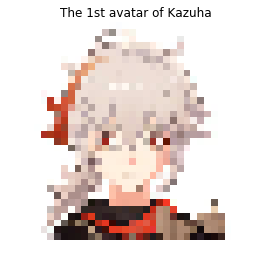

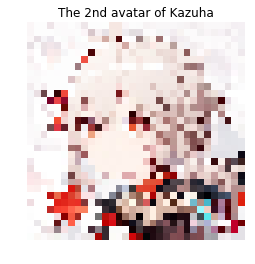

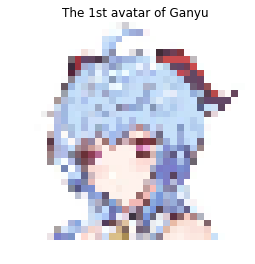

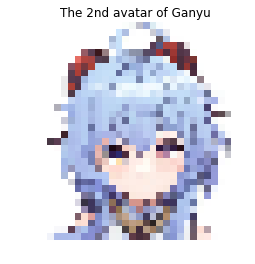

In [5]:
#kazuha1
kazuha1_arr = getCVArray(r"statics/kazuha1.png", 'The 1st avatar of Kazuha')


# Kazuha2
kazuha2_arr = getCVArray(r"statics/kazuha2.jpg", 'The 2nd avatar of Kazuha')


# Ganyu1
ganyu1_arr = getCVArray(r"statics/ganyu1.png", 'The 1st avatar of Ganyu')


# Ganyu2
ganyu2_arr = getCVArray(r"statics/ganyu2.png", 'The 2nd avatar of Ganyu')


# plt.figure()
# plt.imshow(kazuha1)
# plt.show()
# plt.figure()
# plt.imshow(kazuha1_arr)
# plt.title('reconstruct')
# plt.show()

(1024, 3)
(1024, 2)


TypeError: Invalid dimensions for image data

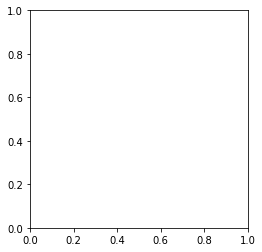

In [6]:
kazuha1_pca = PCA()
print(kazuha1_arr.shape)
kazuha1_pca.train(kazuha1_arr)
kazuha1_rgb2 = kazuha1_pca.transform(kazuha1_arr, 2)
print(kazuha1_rgb2.shape)
kazuha1_resized = np.resize(kazuha1_rgb2, (2,size, size))
plt.imshow(kazuha1_resized)
plt.title('the 2 rgb avatar of Kazuha')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
print(kazuha1_resized.shape)
print(kazuha1_resized)